# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Overview the Data Set
* I will use "sign language digits data set" for this tutorial.
* Image size: 64x64
* Color space: Grayscale
* File format: npy
* Number of classes: 10 (Digits: 0-9)
* Number of participant students: 218
* Number of samples per student: 10

(-0.5, 63.5, 63.5, -0.5)

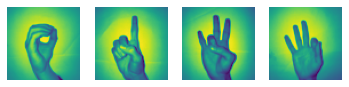

In [2]:
#Load Data Set
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 4, 1)
plt.imshow(x_l[264].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(x_l[900].reshape(img_size,img_size))
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(x_l[512].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(x_l[25].reshape(img_size,img_size))
plt.axis('off')

In [3]:
# concatenate directories
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0)
# from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


* The shape of the X is (410, 64, 64)
    * 410 means that we have 410 images (zero and one signs)
    * 64 means that our image size is 64x64 (64x64 pixels)
* The shape of the Y is (410,1)
    *  410 means that we have 410 labels (0 and 1) 

* Split X and Y into train and test sets.
     * test_size = percentage of test size. test = 15% and train = 75%
* random_state = use same seed while randomizing. 

In [4]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

* Our label array (Y) is already flatten(2D) so we leave it like that.
* Lets flatten X array(images array).

In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


* 348 images and each image has 4096 pixels in image train array.
* 62 images and each image has 4096 pixels in image test array.

<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

In [6]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


## Computation Graph

<a href="computation_graph"><img src="https://i.ibb.co/9Hvb2Yf/5.jpg" alt="3" border="0"></a>

* z = b + px1w1 + px2w2 + ... + px4096*w4096
* Parameters are weight and bias.
* Weights: coefficients of each pixels
* Bias: intercept
* z = (w.t)x + b => z equals to (transpose of weights times input x) + bias
* y_head = sigmoid(z)

## Initializing parameters
* Each pixels have own weights.
* The first step is multiplying each pixels with their own weights.
* The question is that what is the initial value of weights?
    * There are some techniques that I will explain at artificial neural network but for this time initial weights are 0.01.
    * Also initial bias is 0.

In [7]:
# short description and example of definition
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

## Forward Propagation
* The all steps from pixels to cost is called forward propagation
    * z = (w.T)x + b => in this equation we know x that is pixel array, we know w (weights) and b (bias) so the rest is calculation. (T is transpose)
    * Then we put z into sigmoid function that returns y_head(probability). 
    * Then we calculate loss(error) function.
    * Cost function is summation of all loss(error).
    * Lets start with z and the write sigmoid definition(method) that takes z as input parameter and returns y_head(probability)

In [8]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(z)

### -Sigmoid Function
<a href="sigmoid_function"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png" alt="3" border="0"></a>

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. A common example of a sigmoid function is the logistic function shown in the first figure and defined by the formula:

<a href="sigmoid_function"><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9537e778e229470d85a68ee0b099c08298a1a3f6" alt="3" border="0"></a>

### -Loss Function


* Mathematical expression of log loss(error) function is that:
<a href="loss_function"><img src="https://image.ibb.co/eC0JCK/duzeltme.jpg" alt="3" border="0"></a>

### -Cost Function
the cost function is summation of loss function. Each image creates loss function. Cost function is summation of loss functions that is created by each input image.

In [9]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

## Optimization Algorithm with Gradient Descent

In order to decrease cost, we need to update weights and bias.
In other words, our model needs to learn the parameters weights and bias that minimize cost function. This technique is called gradient descent.
* We have w = 5 and bias = 0 (so ignore bias for now). Then we make forward propagation and our cost function is 1.5.
* It looks like this. (red lines)
<a href="Gradient Descent"><img src="http://image.ibb.co/dAaYJH/7.jpg" alt="3" border="0"></a>

* As you can see from graph, we are not at minimum point of cost function. Therefore we need to go through minimum cost. Okey, lets update weight. ( the symbol := is updating)
* w := w - step. The question is what is this step? Step is slope1. Okey, it looks remarkable. In order to find minimum point, we can use slope1. Then lets say slope1 = 3 and update our weight. w := w - slope1 => w = 2.
* Now, our weight w is 2. As you remember, we need to find cost function with forward propagation again.
* Lets say according to forward propagation with w = 2, cost function is 0.4. We are at right way because our cost function is decrease. We have new value for cost function that is cost = 0.4. Is that enough? Actually I do not know lets try one more step.
* Slope2 = 0.7 and w = 2. Lets update weight w : = w - step(slope2) => w = 1.3 that is new weight. So lets find new cost.
* Make one more forward propagation with w = 1.3 and our cost = 0.3. Okey, our cost even decreased, it looks like fine but is it enough or do we need to make one more step? The answer is again I do not know, lets try.
* Slope3 = 0.01 and w = 1.3. Updating weight w := w - step(slope3) => w = 1.29 ~ 1.3. So weight does not change because we find minimum point of cost function.
* Update equation is this. It says that there is a cost function(takes weight and bias). Take derivative of cost function according to weight and bias. Then multiply it with α learning rate. Then update weight. (In order to explain I ignore bias but these all steps will be applied for bias)
<a href="Gradient Descent"><img src="http://image.ibb.co/hYTTJH/8.jpg" alt="3" border="0"></a>
* Learning rate is also called hyperparameter that need to be chosen and tuned.
<a href="Gradient Descent"><img src="https://i.ibb.co/QQ43Sbm/ss.png" alt="3" border="0"></a>

In [10]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

* Up to this point we learn
    * Initializing parameters (implemented)
    * Finding cost with forward propagation and cost function (implemented)
    * Learning parameters (weight and bias). Now lets implement it.

In [11]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

## Implementing Prediction

In [12]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

## Implementing Logistic Regression 

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


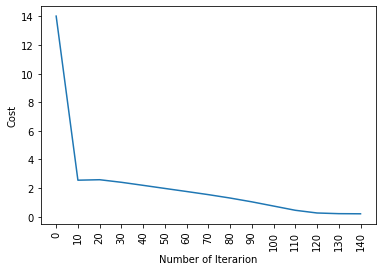

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [13]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

# Logistic Regression with Sklearn

In [14]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 
